In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-chain-sales-dataset/Coffee_Chain_Sales .csv


### Business Study - Effectiveness of Marketing on Sales

Objective: Understand the impact of marketing costs on sales to determine how effective the current marketing strategy is and identify regions where the effectiveness may plateau. This can allow us to optimize the marketing costs to maximize profitbality and sales.

Rationale: Marketing is a significant factor in creating sales, however it is important identify where the marketing costs begin to become inefficient. The data analysis will help answer the question if at any point where the inefficiency takes place or that there is a linear relationship between sales and marketing.

Hypothesis: Marketing costs are positively correlated with sales across various product lines and markets. However, we also anticipiate identifying a point of diminishing returns where the incremental benefir of additional marketing spend decreases


**Methodology:**

* Data Analysis: Use historical sales data to understand the relationship between sales and marketing expenditures

* Regression Modeling: Create models to visualize the impact of marketing on sales and identify the points of diminishing returns

* Comparitive Analysis: Compare sales performance before and after reaching the hypothesized thresholds to validate the exisitence of diminishing returns


**Expected Outcomes:**

 * Establish a clear relationship between marketing costs and sales
 
 * Identify the point in marketing spend where the ROI beings to decline
 
 * Provide strategiv recommendation on optimaal marketing spends for maximizing sales
 

**Significance:**

Enable the business to make more informed decisions in regard to the marketing budgets, ensuring the funds are used to achieve maximum impact on sales


#### Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('/kaggle/input/coffee-chain-sales-dataset/Coffee_Chain_Sales .csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Check if we have missing data 

df.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

In [7]:
# Check for duplicate rows

df.duplicated().sum()

0

In [8]:
# Outlier detection 

df.describe([x*0.1 for x in range(10)])

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,2014-03-14 12:01:21.355932416,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
min,203.000000,0.000000,-369.000000,2012-10-01 00:00:00,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
0%,203.000000,0.000000,-369.000000,2012-10-01 00:00:00,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
10%,262.000000,25.000000,-34.000000,2013-01-14 02:24:00,321.000000,32.000000,7.000000,-4.000000,61.000000,20.000000,30.000000,10.000000,50.000000,19.000000
20%,360.000000,36.000000,-20.000000,2013-04-30 04:48:00,411.000000,47.000000,12.000000,12.000000,86.000000,30.000000,40.000000,20.000000,70.000000,26.000000
30%,435.000000,45.000000,-13.000000,2013-08-14 07:12:00,482.000000,59.000000,14.000000,22.000000,109.000000,30.000000,50.000000,30.000000,90.000000,37.000000
40%,509.000000,51.000000,-8.000000,2013-11-28 09:36:00,572.000000,68.000000,17.000000,30.000000,122.000000,40.000000,60.000000,40.000000,100.000000,42.000000
50%,573.000000,57.000000,-3.000000,2014-03-14 12:00:00,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
60%,636.000000,75.000000,2.000000,2014-06-28 14:24:00,829.000000,88.000000,27.000000,49.000000,164.000000,60.000000,80.000000,50.000000,140.000000,54.000000


`DifferenceBetweenActualandTargetProfit`, `Inventory Margin`, `Margin`, and `Profit` all seem to show some outliers. To further investigate, let's examine an outlier row in more detail

In [9]:
fig = px.histogram(df, 
                   x = 'DifferenceBetweenActualandTargetProfit', 
                   nbins = 75, 
                   title = 'Distributions of Difference Between Actual and Target Profits', 
                   labels={'DifferenceBetweenActualandTargetProfit': 'Difference Between Actual and Target Profit'},
                   marginal = 'rug',
                   hover_data = df.columns,
                   template = 'plotly_white')
fig.show()

It looks like Green Tea seems to be the problematic product in Nevada. There are three instances of it showing very low profit. Let's comapre Green Tea across different markets.

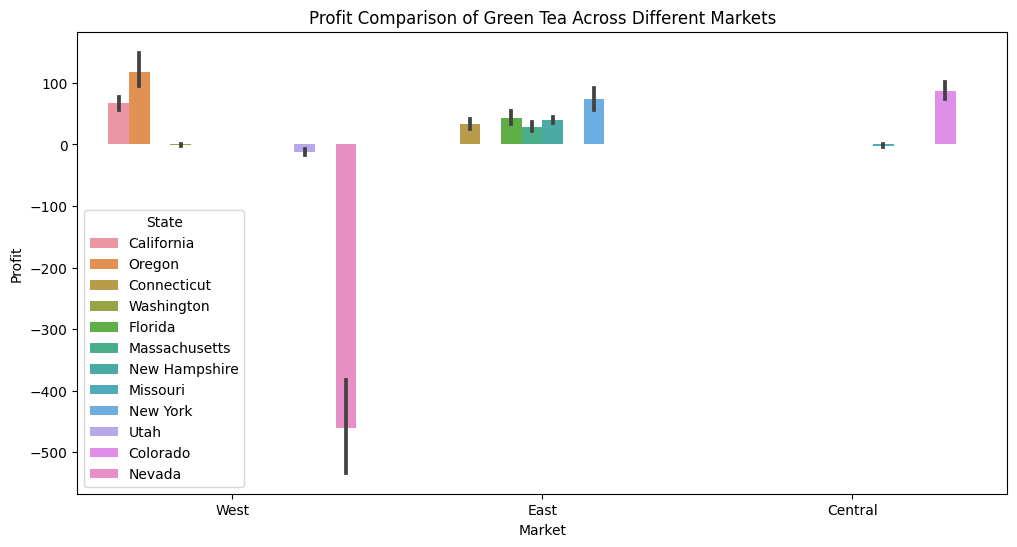

In [10]:
# Filter data for 'Green Tea' across all markets
green_tea_data = df[(df['Product'] == 'Green Tea')]

# Plot to compare sales and profits in different markets
plt.figure(figsize=(12, 6))
sns.barplot(data=green_tea_data, x='Market', y='Profit', hue='State')
plt.title('Profit Comparison of Green Tea Across Different Markets')
plt.show()

There clearly seems to be an issue with two stores **(702 and 775)** in Nevada displaying very low profits. The next step would be to analyze the performance of different products in the same market 

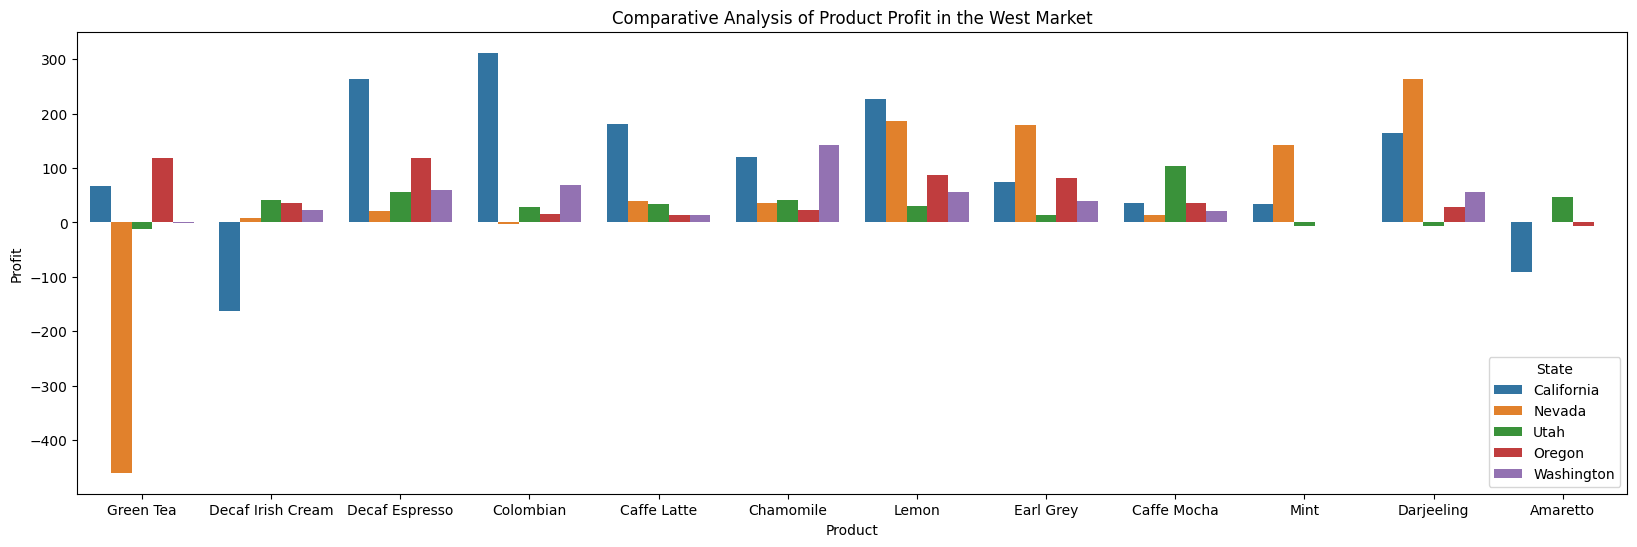

In [11]:
west_market_data = df[df['Market']=='West']

plt.figure(figsize = (20,6))
sns.barplot(data= west_market_data, x='Product', y='Profit', errorbar = None, hue = 'State')
plt.title('Comparative Analysis of Product Profit in the West Market')
plt.show()


Once again Green Tea seems to be the only issue in Nevada. To further understand the low profit, it would be useful to analyze the inventory margin. The current hypothesis is that too much stock could have been ordered. We found two stores that seem to display low levels of inventory margin. Let's visualize the relationship between inventory margin and profit for the problematic stores

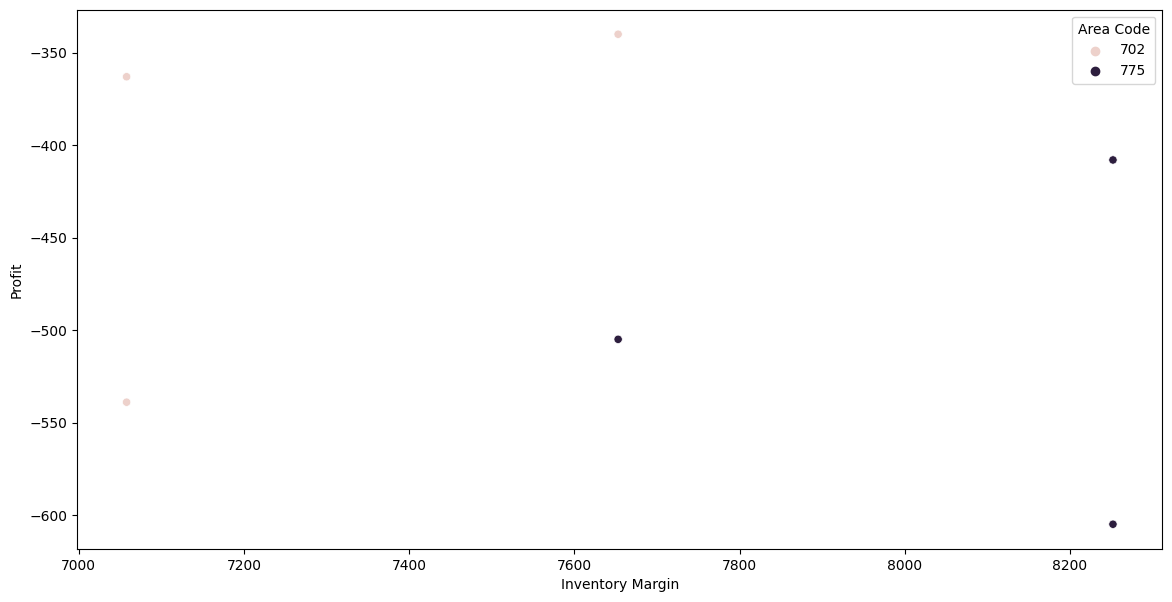

In [12]:
nevada_green_tea = df[(df['Product'] == 'Green Tea') & (df['State'] == 'Nevada') & (df['Area Code'].isin([702, 775]))]

plt.figure(figsize=(14,7))

sns.scatterplot(data=nevada_green_tea, x = 'Inventory Margin', y = 'Profit', hue = 'Area Code')
plt.xlabel('Inventory Margin')
plt.ylabel('Profit')

plt.show()

In [13]:
correlation = nevada_green_tea['Inventory Margin'].corr(nevada_green_tea['Profit'])
print(correlation)

-0.2354731810597489


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



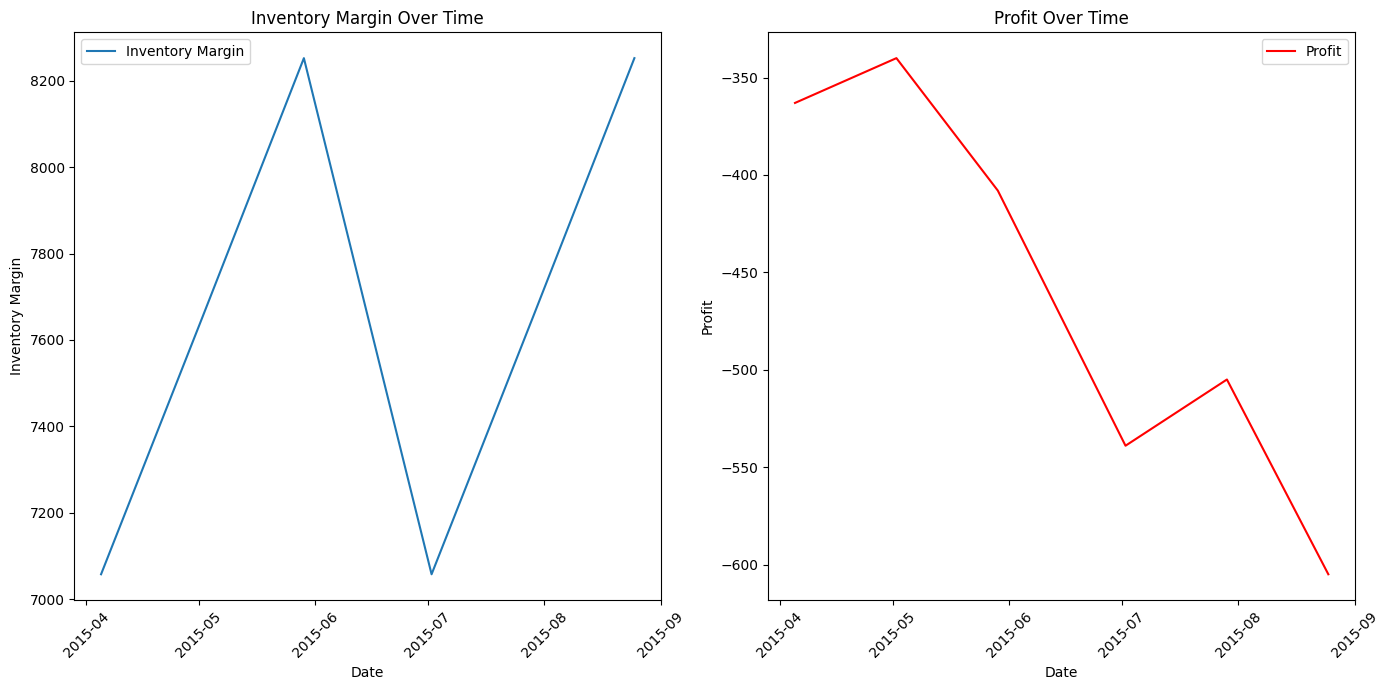

Correlation between Inventory Margin and Profit: -0.2354731810597489


In [14]:
# Filter for Green Tea in Nevada
green_tea_nv = df[(df['Product'] == 'Green Tea') & (df['State'] == 'Nevada')]

# Plot inventory margin and profit over time
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=green_tea_nv, x='Date', y='Inventory Margin', label='Inventory Margin')
plt.title('Inventory Margin Over Time')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=green_tea_nv, x='Date', y='Profit', label='Profit', color='red')
plt.title('Profit Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation analysis
print("Correlation between Inventory Margin and Profit:", green_tea_nv['Inventory Margin'].corr(green_tea_nv['Profit']))


We can see a slight negative correlation that as inventory margin increases, the profit for green tea decreases. This further supports our hypothesis that overstocking could be the cause for low profits of Green Tea sales in Nevada. In order to avoid this in the future, let's conduct an inventory analysis to optimize inventory levels.

The first step would to calculate the inventory turnover ratio. This is to show how many times the inventory is sold and replaced over a specific period. 

- High turnover ratio tells us that the company is selling its inventory quickly and efficiently

- Low turnover ratio indicates poor stock management

In [15]:
inventory_turnover = green_tea_nv['Inventory Turnover'] = green_tea_nv['Sales'] / green_tea_nv['Inventory Margin']

print(inventory_turnover)

917     0.002975
944     0.004181
971     0.003757
1005    0.003117
1032    0.004443
1059    0.003999
dtype: float64


/tmp/ipykernel_33/2831424696.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The inventory turnover ratio for Green Tea in Nevada is quite low, indicating that the inventory is not being sold and replenished correctly. The low turnover suggests thatthe inventory levels are disproportionately high compared to sales. If we take into account potential storage and maintenance costs, it would explain such low levels of profitability.

#### Dealing with Outliers

First let's check if it is a human error. Examine sales column to see if there are any negative Sales. Also, it would be interesting to see negative profit as well.

In [16]:
negative_sales = df[df['Sales'] < 0]
negative_profit = df[df['Profit'] < 0]

print("Negative Sales Entries:", negative_sales)
print("Negative Profit Entries:", negative_profit)

Negative Sales Entries: Empty DataFrame
Columns: [Area Code, Cogs, DifferenceBetweenActualandTargetProfit, Date, Inventory Margin, Margin, Market_size, Market, Marketing, Product_line, Product_type, Product, Profit, Sales, State, Target_cogs, Target_margin, Target_profit, Target_sales , Total_expenses, Type]
Index: []

[0 rows x 21 columns]
Negative Profit Entries:       Area Code  Cogs  DifferenceBetweenActualandTargetProfit       Date  \
0           303    51                                     -35 2012-10-01   
12          603    45                                     -37 2012-10-12   
14          775    34                                     -32 2012-10-14   
16          573    45                                     -36 2012-10-16   
26          774    52                                      -8 2012-10-26   
...         ...   ...                                     ...        ...   
1032        775   245                                    -225 2015-07-29   
1034        951   224   

In [17]:
df['z_score_inventory'] = (df['Inventory Margin'] - df['Inventory Margin'].mean()) / df['Inventory Margin'].std()

# Filter the data
df_removed_outliers = df[(df['z_score_inventory'] > -3) & (df['z_score_inventory'] < 3)]



From what we have seen, the outlier is not a human data error, but rather an anamoly. The decision would be to remove this entry to prevent a skewed analysis. However, we must take into account inventory optimization techniques to prevent an event like this occuring again.

In [18]:
df_removed_outliers

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,z_score_inventory
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,...,-5,122,Colorado,30,60,30,90,76,Decaf,-0.340744
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,...,26,123,Colorado,30,60,50,90,45,Decaf,-0.447713
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,...,28,107,Texas,30,60,50,90,36,Decaf,-0.432432
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,...,35,94,Florida,40,60,50,100,21,Regular,0.060934
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,...,56,182,California,20,60,50,80,54,Regular,-0.180291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,775,247,169,2015-08-22,1744,329,Small Market,West,81,Leaves,...,319,614,Nevada,180,240,150,420,114,Regular,1.013828
1057,775,250,133,2015-08-23,1820,251,Small Market,West,70,Leaves,...,233,534,Nevada,180,180,100,360,94,Regular,1.096783
1058,971,88,48,2015-08-24,817,133,Small Market,West,29,Leaves,...,108,236,Oregon,60,100,60,160,60,Regular,0.001992
1060,503,134,80,2015-08-26,690,186,Small Market,West,41,Leaves,...,180,341,Oregon,90,140,100,230,65,Regular,-0.136631


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



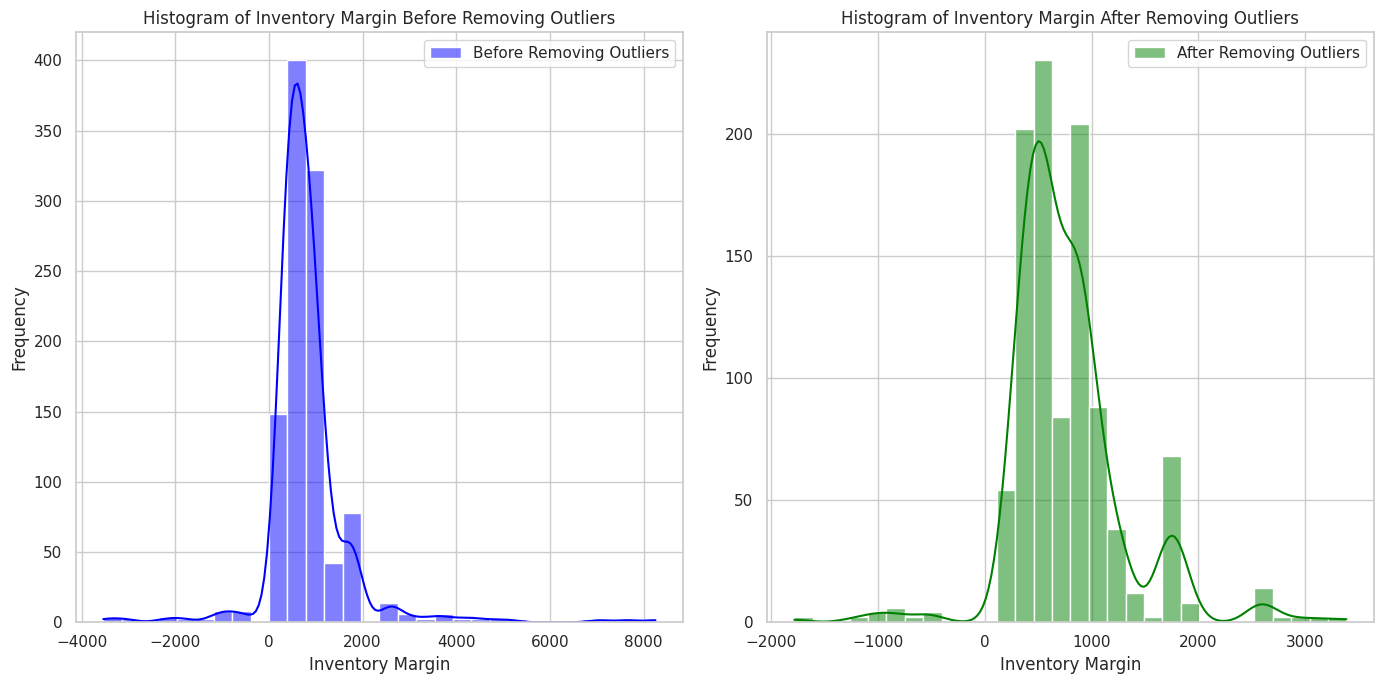

In [37]:
sns.set(style='whitegrid')


plt.figure(figsize=(14, 7))

# First subplot: Histogram of Inventory Margin before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(df['Inventory Margin'], kde=True, color='blue', bins=30, label='Before Removing Outliers')
plt.title('Histogram of Inventory Margin Before Removing Outliers')
plt.xlabel('Inventory Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Second subplot: Histogram of Inventory Margin after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(df_removed_outliers['Inventory Margin'], kde=True, color='green', bins=30, label='After Removing Outliers')
plt.title('Histogram of Inventory Margin After Removing Outliers')
plt.xlabel('Inventory Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


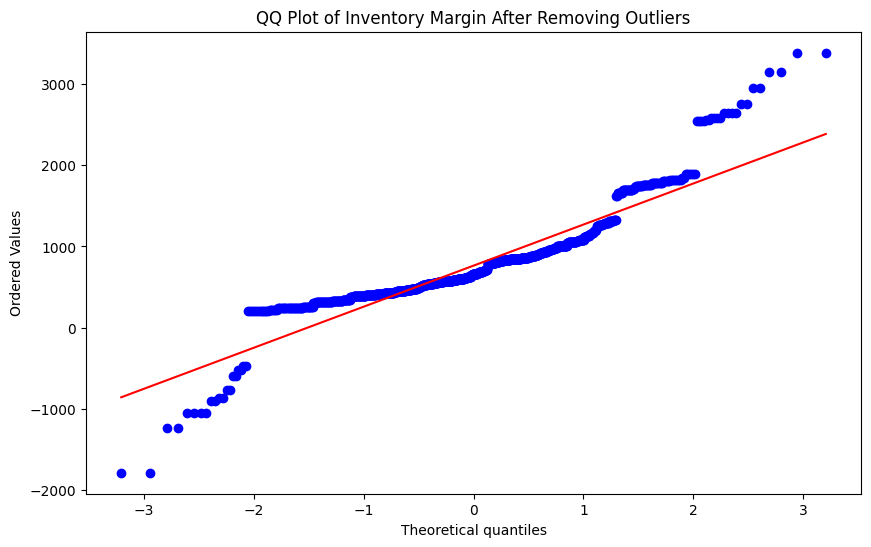

In [32]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df_removed_outliers['Inventory Margin'], dist="norm", plot=plt)
plt.title('QQ Plot of Inventory Margin After Removing Outliers')
plt.show()


In [21]:
loss_analysis = df[df['Profit'] < 0].groupby(['Product', 'State']).agg({
'Profit': 'sum',
'Sales': 'sum',
'Marketing': 'sum',
'Inventory Margin': 'mean' 
}).sort_values(by='Profit')

print(loss_analysis)

                                 Profit  Sales  Marketing  Inventory Margin
Product           State                                                    
Green Tea         Nevada          -2760    173        600       7654.333333
Caffe Mocha       New York        -1560    405        688       3389.333333
Mint              New York        -1279    976        434       4741.000000
Decaf Irish Cream California       -976    968        360       3926.333333
Amaretto          California       -542    676        230       2753.333333
Caffe Mocha       Massachusetts     -97    693        270        555.666667
Lemon             Missouri          -87    477        102       1751.000000
Mint              Utah              -87    477        102       1751.000000
Decaf Irish Cream New Mexico        -85    477        102       1751.000000
Regular Espresso  New Hampshire     -77    366         56        212.666667
Caffe Latte       New Mexico        -77    366         56       -528.666667
Earl Grey   

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



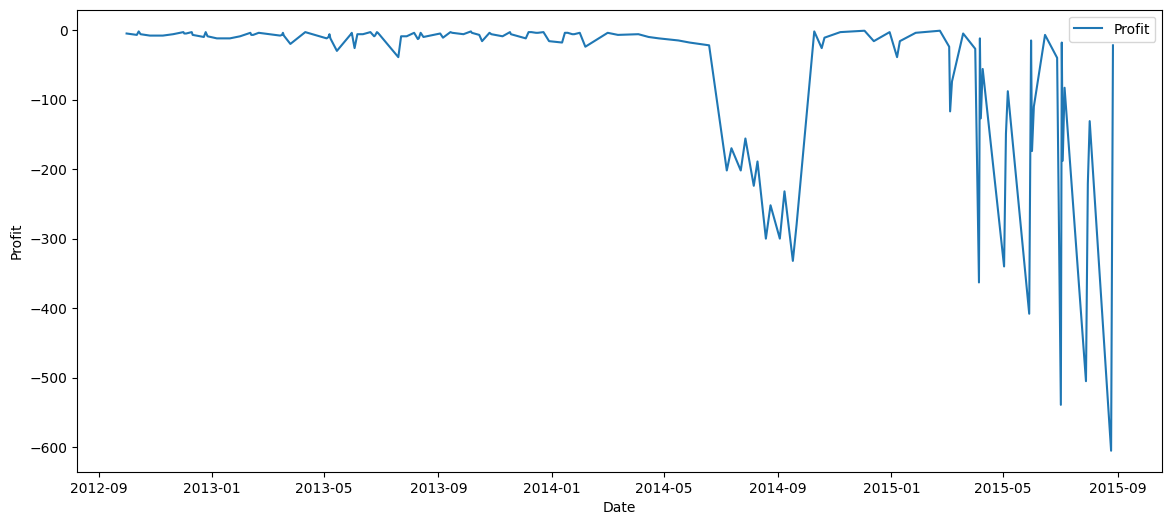

In [22]:
plt.figure(figsize = (14,6))

sns.lineplot(data = df[df['Profit'] < 0], x = 'Date', y='Profit', label = 'Profit')
plt.show()

In [23]:
filtered_data.describe()

NameError: name 'filtered_data' is not defined